In [ ]:
import numpy as np
from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
from skimage.transform import resize
# from skimage.io import imread,imshow,show
from glob import glob
from os import listdir
import csv
# %matplotlib nbagg
# %matplotlib qt
# %matplotlib inline
import matplotlib.pyplot as plt
from skimage.draw import polygon_perimeter
from IPython.core.debugger import Tracer
import scipy.misc

saving_path = "/work/vsankar/Project-Luna/data/array_new/"

start = 1000
stop = 1010

imgaes = np.load(saving_path+"Images_mask1_"+str(start)+"_"+ str(stop)+"_.npy")

nodule_images_border = np.load(saving_path+"nodule_images_border1_"+str(start)+"_"+ str(stop)+"_.npy")
    
mal = np.load(saving_path+"mal_mask1_"+str(start)+"_"+ str(stop)+"_.npy")

labels = np.load(saving_path+"label1_"+str(start)+"_"+ str(stop)+"_.npy")

# Tracer()()

for i in range(10):
    
    print(i)
    
    start = i*100
    stop = (i+1)*100
    
    imgaes1 = np.load(saving_path+"Images_mask1_"+str(start)+"_"+ str(stop)+"_.npy")
    imgaes = np.append(imgaes, imgaes1, axis=0)

    nodule_images_border1 = np.load(saving_path+"nodule_images_border1_"+str(start)+"_"+ str(stop)+"_.npy")
    nodule_images_border = np.append(nodule_images_border, nodule_images_border1, axis=0)
    
    mal1 = np.load(saving_path+"mal_mask1_"+str(start)+"_"+ str(stop)+"_.npy")
    mal = np.append(mal, mal1, axis=0)
    
    labels1 = np.load(saving_path+"label1_"+str(start)+"_"+ str(stop)+"_.npy")
    labels = np.append(labels, labels1, axis=0)
    
#     Tracer()()
    

In [ ]:
saving_path_new = "/work/vsankar/Project-Luna/data/array_new/np_array/"
np.save(saving_path_new+'nodules',imgaes)
np.save(saving_path_new+'nodule_images_border1', nodule_images_border)
np.save(saving_path_new+'mal', mal)
np.save(saving_path_new+'labels', labels)    

In [11]:
def Y_threshold(Y_new):
    Y = Y_new.copy()
    for i,y in enumerate(Y_new):
        if round(y)<3:
            Y[i] = 0.0            
        elif round(y)>=3:
            Y[i] = 1.0
            
    #     Tracer()()        
#     y_true = map(lambda x:(x==0)|(x==1),Y)
#     Y = Y[y_true]
#     X = X[y_true]  

    return Y

In [22]:
import numpy as np
import matplotlib.pyplot as plt
saving_path_new = "/work/vsankar/Project-Luna/data/array_new/np_array/"
imgaes= np.load(saving_path_new+'nodules.npy')
nodule_images_border = np.load(saving_path_new+'nodule_images_border1.npy')
mal = np.load(saving_path_new+'mal.npy')
labels = np.load(saving_path_new+'labels.npy')    

from sklearn.utils import shuffle
imgaes, nodule_images_border, mal,labels = shuffle(imgaes, nodule_images_border, mal,labels, random_state=0)

In [23]:
labels = Y_threshold(mal)

In [24]:
mal[0:50]

array([ 2.75      ,  2.75      ,  4.25      ,  3.        ,  1.5       ,
        2.        ,  1.        ,  3.        ,  3.33333333,  2.        ,
        2.        ,  1.        ,  2.66666667,  5.        ,  4.        ,
        3.        ,  4.        ,  3.75      ,  1.        ,  3.5       ,
        1.25      ,  2.        ,  2.33333333,  3.        ,  3.33333333,
        4.        ,  3.        ,  3.66666667,  3.25      ,  4.        ,
        4.33333333,  3.        ,  3.75      ,  3.25      ,  3.5       ,
        2.66666667,  5.        ,  2.        ,  2.66666667,  3.5       ,
        2.        ,  2.33333333,  2.5       ,  3.        ,  5.        ,
        4.66666667,  4.        ,  4.25      ,  3.5       ,  3.        ])

In [25]:
labels[0:50]

array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

mal

mal

In [26]:
saving_path_new = "/work/vsankar/Project-Luna/data/array_new/np_array/"
saving_path_new+'nodules'

'/work/vsankar/Project-Luna/data/array_new/np_array/nodules'

In [27]:
labels0 = labels[np.where(labels==0)]
labels1 = labels[np.where(labels==1)]
labels2 = labels[np.where(labels==2)]

print('len(y=0) = ' + str(len(labels0)))
print('len(y=1) = ' + str(len(labels1)))
print('len(y=2) = ' + str(len(labels2)))


len(y=0) = 8352
len(y=1) = 28947
len(y=2) = 0


In [28]:

y_true0 = map(lambda x:(x==0),labels)
y_true1 = map(lambda x:(x==1),labels)
y_true2 = map(lambda x:(x==2),labels)


In [29]:
len(y_true0)

37302

In [30]:
labels0 = labels[y_true0]
labels1 = labels[y_true1]
labels2 = labels[y_true2]



imgaes0 = imgaes[y_true0]
imgaes1 = imgaes[y_true1]
imgaes2 = imgaes[y_true2]


nodule_images_border0 = nodule_images_border[y_true0]
nodule_images_border1 = nodule_images_border[y_true1]
nodule_images_border2 = nodule_images_border[y_true2]



In [31]:
nodule_images_border1.shape


(28947, 1, 96, 96, 3)

In [32]:
lables_new = labels0[0:1000]
lables_new = np.append(lables_new, labels1[0:1000], axis=0)
# lables_new = np.append(lables_new, labels2[0:1000], axis=0)

imgaes_new = imgaes0[0:1000]
imgaes_new = np.append(imgaes_new, imgaes1[0:1000], axis=0)
# imgaes_new = np.append(imgaes_new, imgaes2[0:1000], axis=0)

nodule_images_border_new = nodule_images_border0[0:1000]
nodule_images_border_new = np.append(nodule_images_border_new, nodule_images_border1[0:1000], axis=0)
# nodule_images_border_new = np.append(nodule_images_border_new, nodule_images_border2[0:1000], axis=0)



In [34]:
nodule_images_border_new.shape


(2000, 1, 96, 96, 3)

In [35]:
saving_path_new = "/work/vsankar/Project-Luna/data/array_new/np_array/"
np.save(saving_path_new+'nodules_new_01_2000',imgaes_new)
np.save(saving_path_new+'nodule_images_border_new_01_2000', nodule_images_border_new)
np.save(saving_path_new+'labels_new_01_2000', lables_new)    



In [1]:
import numpy as np
import matplotlib.pyplot as plt

saving_path_new = "/work/vsankar/Project-Luna/data/array_new/np_array/"
imgaes_new = np.load(saving_path_new+'nodules_new.npy')
nodule_images_border_new = np.load(saving_path_new+'nodule_images_border_new.npy' )
lables_new = np.load(saving_path_new+'labels_new.npy')    


In [2]:
imgaes_new.shape

(3000, 1, 96, 96)

In [ ]:
labels0.shape
# imgaes1.shape
# nodule_images_border2.shape

In [ ]:
nodule_images_border.shape


In [ ]:
imgaes.shape

In [ ]:
labels.shape

In [ ]:
mal.shape

In [ ]:
labels[1:1000]


In [ ]:
mal

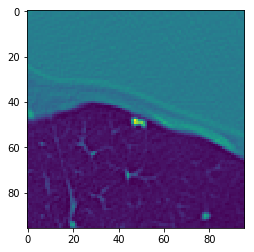

In [4]:
import matplotlib.pyplot as plt
plt.imshow(imgaes_new[340,0,:,:]); plt.show()

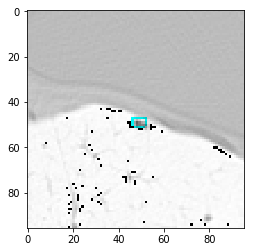

In [5]:
plt.imshow(nodule_images_border_new[340,0,:,:,:]); plt.show()

In [6]:
lables_new[340]

0.0